In [ ]:
# To download dataset from google drive
!pip install gdown
!pip install livelossplot

!gdown --folder https://drive.google.com/drive/folders/10hdIXJqE_NJQIcxClntP_wfePXGKvEAQ?usp=share_link

In [ ]:
# import library
import os
import cv2
import numpy as np
import keras
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

import os
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb
import itertools

import matplotlib.pyplot as plt

**Data**

In [ ]:
# load data
x_test = np.load('/content/X_test.npy')
x_train = np.load('/content/X_train.npy')
y_test = np.load('/content/Y_test.npy')
y_train = np.load('/content/Y_train.npy')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(69600, 28, 28, 3)
(69600, 29)
(17400, 28, 28, 3)
(17400, 29)


**Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 29, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

**Training**

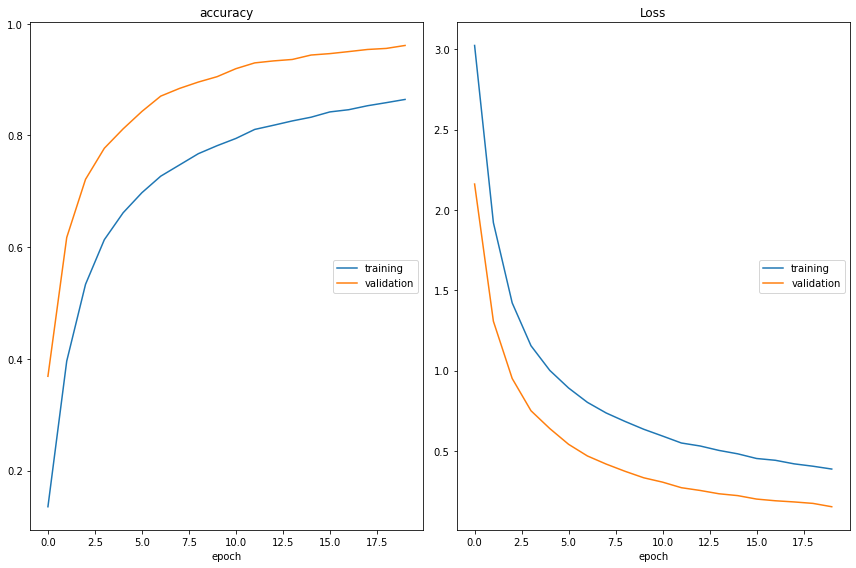

accuracy
	training         	 (min:    0.135, max:    0.865, cur:    0.865)
	validation       	 (min:    0.369, max:    0.961, cur:    0.961)
Loss
	training         	 (min:    0.387, max:    3.024, cur:    0.387)
	validation       	 (min:    0.153, max:    2.161, cur:    0.153)

Epoch 20: saving model to model_weights.h5
136/136 [==============================] - 3s 19ms/step - loss: 0.3873 - accuracy: 0.8645 - val_loss: 0.1528 - val_accuracy: 0.9611


In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

callbacks = [PlotLossesKerasTF(),checkpoint]

history = model.fit(x_train, y_train, batch_size = 512, epochs = 20, verbose = 1, validation_data = (x_test, y_test),callbacks=callbacks)

**Testing**

Classification Report

In [ ]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       600
           1       0.92      0.99      0.96       600
           2       0.98      0.99      0.99       600
           3       0.99      0.97      0.98       600
           4       0.98      0.98      0.98       600
           5       0.98      0.92      0.95       600
           6       1.00      0.99      1.00       600
           7       0.98      0.98      0.98       600
           8       0.98      0.98      0.98       600
           9       0.97      0.99      0.98       600
          10       0.99      0.99      0.99       600
          11       0.98      0.95      0.97       600
          12       0.99      0.97      0.98       600
          13       0.90      0.94      0.92       600
          14       0.95      0.89      0.92       600
          15       0.99      1.00      1.00       600
          16       0.95      0.95      0.95       600
          17       0.99    

Confusion matrix

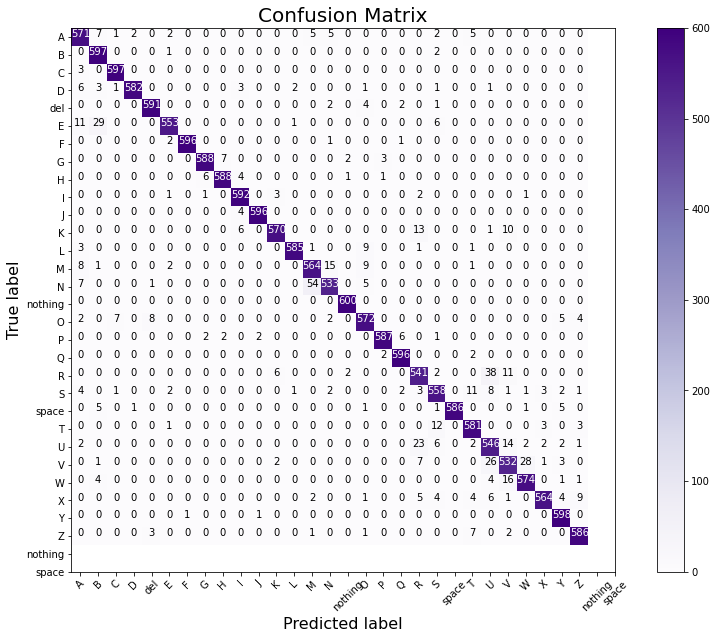

In [ ]:
classes = ['A', 'B', 'C', 'D','del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S','space', 'T', 'U', 'V', 'W', 'X', 'Y','Z','nothing','space']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15, 10))
ax = plt.subplot()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
plt.colorbar()
plt.title("Confusion Matrix")
tick = np.arange(len(classes))
plt.xticks(tick, classes, rotation=45)
plt.yticks(tick, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
limit = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
plt.show()

**Demo**

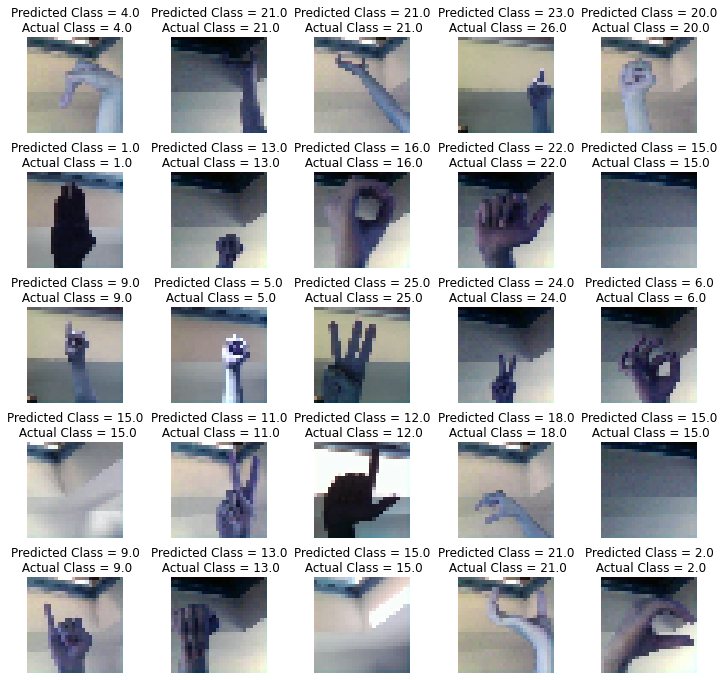

In [ ]:
fig, a = plt.subplots(5, 5, figsize = (12,12))
a = a.ravel()
test_len = len(x_test)
for i in np.arange(0, 25):
    index = np.random.randint(0, test_len)
    a[i].imshow(x_test[index])
    a[i].set_title(f"Predicted Class = {y_pred[index]:0.1f}\n Actual Class = {y_test[index]:0.1f}")
    a[i].axis('off')
plt.subplots_adjust(wspace=0.5)